<a href="https://colab.research.google.com/github/fauk74/Machine-Learning/blob/main/tensorflow_intro_to_computervision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Get the data 
##the images are from https://www.kaggle.com/dansbecker/food-101

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-09-08 16:20:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  84.3MB/s    in 1.2s    

2021-09-08 16:20:17 (84.3 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



# Nuova sezione

In [ ]:
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

NameError: ignored

In [ ]:
#Inspect the data

!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"): print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 1 images in 'pizza_steak' .
There are 2 directories and 1 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 2 directories and 1 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .


In [ ]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Sep  7 03:39 .
drwxr-xr-x 1 root root 4096 Sep  7 03:39 ..
-rw-r--r-- 1 root root 6148 Sep  7 03:39 .DS_Store
drwxr-xr-x 4 root root 4096 Sep  7 03:39 test
drwxr-xr-x 4 root root 4096 Sep  7 03:39 train


In [ ]:
#Visualize our images
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #Create a list of class from subdirectories 
class_names=class_names[1:] #Remove DS STORE
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}")
  return img

['1147047.jpg']
Image shape : (512, 512, 3)


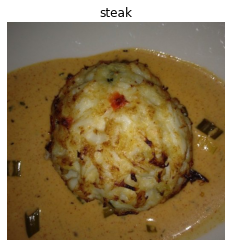

In [ ]:
img=view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [ ]:
#An end-to-end example
#Let's build a CNN 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#setup paths to train dir
train_dir="/content/pizza_steak/train/"
test_dir="pizza_steak/test"

#import data from directories and turn into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode="binary",seed=42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#build a CNN model like atiny VGG

model_1=tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu",
                                   input_shape=(224,224,3)),
            tf.keras.layers.Conv2D(10,3,activation="relu"),
            tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),    
            tf.keras.layers.Conv2D(10,3,activation="relu"),
            tf.keras.layers.Conv2D(10,3,activation="relu"),
            tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

#COmpile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_1=model_1.fit(train_data, 
                      epochs=5, 
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
)


Epoch 1/5
47/47 [==============================] - 42s 257ms/step - loss: 0.5759 - accuracy: 0.6813 - val_loss: 0.3746 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4160 - accuracy: 0.8153 - val_loss: 0.3486 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3813 - accuracy: 0.8387 - val_loss: 0.3389 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3652 - accuracy: 0.8373 - val_loss: 0.3839 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.2995 - accuracy: 0.8787 - val_loss: 0.3006 - val_accuracy: 0.8820


In [ ]:
###LEZIONE 107 alla FINE. 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
#build a Dense model

model_2=tf.keras.models.Sequential([
            tf.keras.layers.Flatten(
                                   input_shape=(224,224,3)),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(4, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

#Compile our NN
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_2=model_2.fit(train_data, 
                      epochs=5, 
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 1.4329 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#build a Dense model

model_3=tf.keras.models.Sequential([
            tf.keras.layers.Flatten(
                                   input_shape=(224,224,3)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

#COmpile our NN
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_3=model_3.fit(train_data, 
                      epochs=5, 
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 214ms/step - loss: 4.8677 - accuracy: 0.6400 - val_loss: 1.9986 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8206 - accuracy: 0.7273 - val_loss: 0.6496 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6423 - accuracy: 0.7440 - val_loss: 0.4913 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.7344 - accuracy: 0.7433 - val_loss: 0.9530 - val_accuracy: 0.6640
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6678 - accuracy: 0.7480 - val_loss: 0.6493 - val_accuracy: 0.7200


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


### 1. BECOME ONE WITH THE DATA

['674001.jpg']
Image shape : (512, 512, 3)
['203831.jpg']
Image shape : (384, 512, 3)


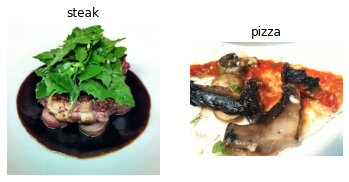

In [ ]:
#Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img=view_random_image("pizza_steak/train/","pizza")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels=train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
#How many batches are there
len(train_data)

47

In [ ]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

*Create a CNN model (start with Baseline)*# Nuova sezione

lezione 114


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4=Sequential([
            Conv2D(filters=10,
                   kernel_size=3,
                   strides=1,
                   padding="valid",
                   activation="relu",
                   input_shape=(224,224,3)),
            Conv2D(10,3, activation="relu"),
            Conv2D(10,3, activation="relu"),
            Flatten(),
            Dense(1, activation="sigmoid")
                    ])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_4=model_4.fit(train_data, 
                      epochs=5, 
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 261ms/step - loss: 0.9536 - accuracy: 0.6600 - val_loss: 0.4195 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 12s 245ms/step - loss: 0.4009 - accuracy: 0.8207 - val_loss: 0.3924 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.2485 - accuracy: 0.9127 - val_loss: 0.3639 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.1159 - accuracy: 0.9673 - val_loss: 0.4183 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 12s 255ms/step - loss: 0.0426 - accuracy: 0.9927 - val_loss: 0.4084 - val_accuracy: 0.8340


In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

NameError: ignored

In [ ]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy= history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))

#Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

#Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



In [ ]:
model_5=Sequential([
                    Conv2D(filters=10,
                   kernel_size=3,
                   strides=1,
                   padding="valid",
                   activation="relu",
                   input_shape=(224,224,3)),
                    

            MaxPool2D(pool_size=2),

            Conv2D(10,3, activation="relu"),
            MaxPool2D(),
            Conv2D(10,3, activation="relu"),
            MaxPool2D(),
            Flatten(),
            Dense(1, activation="sigmoid")
                    ])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5=model_5.fit(train_data, 
                      epochs=5, 
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             

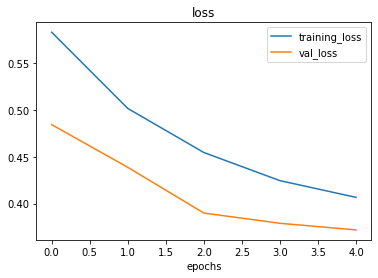

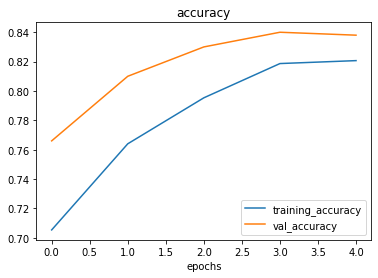

In [ ]:
plot_loss_curves(history_5)

In [ ]:
#Data Augmentation

Data Augmentation

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.3,
                                           horizontal_flip=True)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), class_mode="binary", shuffle=False,batch_size=32)

print("Non-Augmented training data")
# Import data and augment it from directories
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=False) # Shuffle data (default)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels= train_data.next()
augmented_images, augmented_labels=train_data_augmented.next()


showing image number:25


(-0.5, 223.5, 223.5, -0.5)

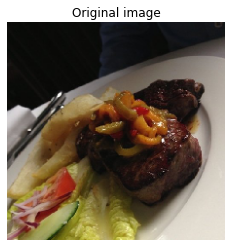

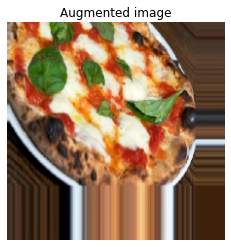

In [ ]:
random_number=random.randint(0,32)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)



In [ ]:
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')



Found 500 images belonging to 2 classes.


In [ ]:

# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data, 
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 27s 554ms/step - loss: 0.7152 - accuracy: 0.4500 - val_loss: 0.6837 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6936 - accuracy: 0.5140 - val_loss: 0.6616 - val_accuracy: 0.5500
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6930 - accuracy: 0.5487 - val_loss: 0.6725 - val_accuracy: 0.5360
Epoch 4/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6802 - accuracy: 0.6060 - val_loss: 0.6131 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6738 - accuracy: 0.5633 - val_loss: 0.5994 - val_accuracy: 0.7060


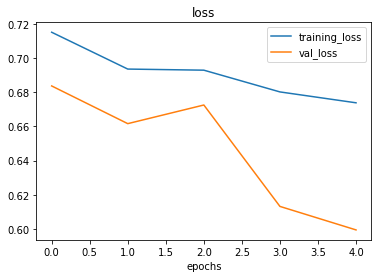

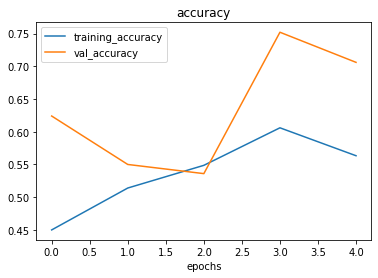

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:

# Create the model (same as model_5)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, 
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6700 - accuracy: 0.5580 - val_loss: 0.6084 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 26s 544ms/step - loss: 0.5950 - accuracy: 0.6880 - val_loss: 0.4681 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 26s 544ms/step - loss: 0.5304 - accuracy: 0.7413 - val_loss: 0.3689 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 26s 545ms/step - loss: 0.5033 - accuracy: 0.7653 - val_loss: 0.3703 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5007 - accuracy: 0.7647 - val_loss: 0.4195 - val_accuracy: 0.8120


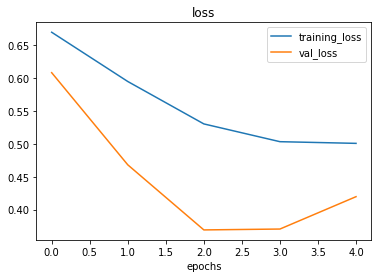

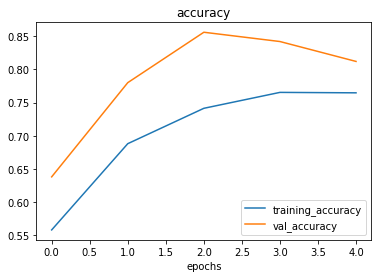

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Create the model 
model_X = Sequential([
  Conv2D(32, 5, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_X.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_X = model_X.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, 
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 28s 564ms/step - loss: 0.6667 - accuracy: 0.5913 - val_loss: 0.5775 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5917 - accuracy: 0.6967 - val_loss: 0.4242 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 26s 560ms/step - loss: 0.5674 - accuracy: 0.7073 - val_loss: 0.5529 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 26s 559ms/step - loss: 0.5289 - accuracy: 0.7340 - val_loss: 0.3910 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 26s 558ms/step - loss: 0.5144 - accuracy: 0.7500 - val_loss: 0.3639 - val_accuracy: 0.8580


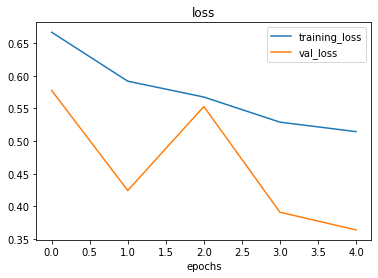

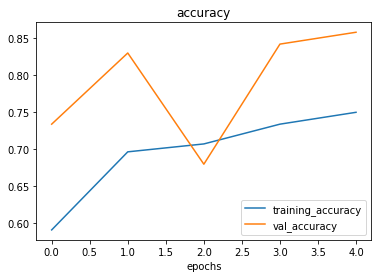

In [ ]:
plot_loss_curves(history_X)

In [ ]:
# Fit the model
history_X = model_X.fit(train_data_augmented_shuffled, # changed to augmented training data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data, 
                        validation_steps=len(test_data)
                        )

Epoch 1/10
47/47 [==============================] - 26s 564ms/step - loss: 0.5329 - accuracy: 0.7307 - val_loss: 0.4141 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 26s 558ms/step - loss: 0.5042 - accuracy: 0.7613 - val_loss: 0.4098 - val_accuracy: 0.8260
Epoch 3/10
47/47 [==============================] - 26s 559ms/step - loss: 0.4938 - accuracy: 0.7707 - val_loss: 0.3321 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 26s 557ms/step - loss: 0.4650 - accuracy: 0.7887 - val_loss: 0.3753 - val_accuracy: 0.8300
Epoch 5/10
47/47 [==============================] - 26s 558ms/step - loss: 0.4510 - accuracy: 0.7993 - val_loss: 0.3178 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 26s 556ms/step - loss: 0.4512 - accuracy: 0.7953 - val_loss: 0.2967 - val_accuracy: 0.8540
Epoch 7/10
47/47 [==============================] - 26s 559ms/step - loss: 0.4355 - accuracy: 0.8147 - val_loss: 0.3066 - val_accuracy: 0.8680

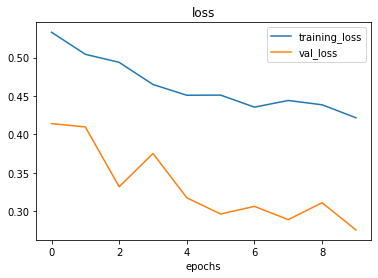

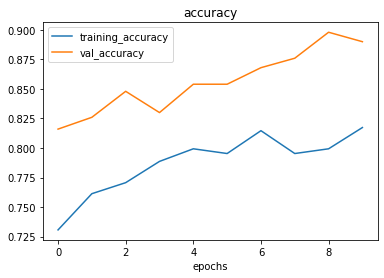

In [ ]:
plot_loss_curves(history_X)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img, size=[img_shape, img_shape])
  img=img/255.
  return img
  

In [ ]:
https://www.collinsdictionary.com/images/thumb/steak_141783133_250.jpg?version=4.0.180

--2021-09-07 04:05:59--  https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.collinsdictionary.com%2Fimages%2Ffull%2Fsteak_141783133.jpg
Resolving www.google.com (www.google.com)... 172.253.120.147, 172.253.120.103, 172.253.120.106, ...
Connecting to www.google.com (www.google.com)|172.253.120.147|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.google.com/imghp [following]
--2021-09-07 04:05:59--  https://www.google.com/imghp
Reusing existing connection to www.google.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://consent.google.com/ml?continue=https://www.google.com/imghp&gl=BE&m=0&pc=ihp&hl=nl&src=1 [following]
--2021-09-07 04:05:59--  https://consent.google.com/ml?continue=https://www.google.com/imghp&gl=BE&m=0&pc=ihp&hl=nl&src=1
Resolving consent.google.com (consent.google.com)... 173.194.76.100, 173.194.76.139, 173.194.76.102, ...
Connecting to consent.google.com (consent.google.com)|173.194.76.

In [ ]:
steak=load_and_prep_image("/content/pizza_steak/test/steak/108310.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.14061625, 0.10140056, 0.10532213],
        [0.14099015, 0.10177446, 0.10569603],
        [0.14919718, 0.1129752 , 0.11689676],
        ...,
        [0.6554364 , 0.84459966, 0.8552267 ],
        [0.59397084, 0.7937797 , 0.8268445 ],
        [0.49666715, 0.7160476 , 0.75780183]],

       [[0.20480944, 0.16559374, 0.16951531],
        [0.20589861, 0.1706045 , 0.17452607],
        [0.20338261, 0.16808848, 0.17201005],
        ...,
        [0.6834418 , 0.8625424 , 0.8845215 ],
        [0.5483335 , 0.7369016 , 0.77534956],
        [0.5608166 , 0.7554606 , 0.805851  ]],

       [[0.208107  , 0.17617422, 0.17673445],
        [0.20733543, 0.17540266, 0.17596288],
        [0.19957857, 0.1676458 , 0.16820602],
        ...,
        [0.6309455 , 0.8034945 , 0.84064454],
        [0.55529666, 0.7262625 , 0.7701913 ],
        [0.6687665 , 0.83963484, 0.88977486]],

       ...,

       [[0.07704832, 0.07312675, 0.05744048],
        [0.07

In [ ]:
pred_class=class_names[int(tf.round(pred))]


# MULTI CLASS CLASSIFICATION

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-09-08 16:22:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   163MB/s    in 3.0s    

2021-09-08 16:22:37 (163 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile
zip_ref=zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}'.")

There are 2 directories and 0 in '10_food_classes_all_data'.
There are 10 directories and 0 in '10_food_classes_all_data/train'.
There are 0 directories and 750 in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 in '10_food_classes_all_data/train/chicken_wings'.
There are 10 directories and 0 in '10_food_classes_all_data/test'.
There are 0 dire

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}")
  return img

['2072164.jpg']
Image shape : (512, 512, 3)


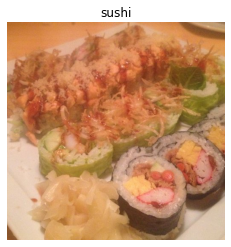

In [ ]:

img=view_random_image(target_dir=train_dir, 
                      target_class=random.choice(class_names))

In [ ]:
##Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation

# Create the model (same as model_5)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),

  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2), # reduce number of features by half

  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data, 
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 485s 2s/step - loss: 2.1418 - accuracy: 0.2131 - val_loss: 1.9672 - val_accuracy: 0.3236
Epoch 2/5
235/235 [==============================] - 478s 2s/step - loss: 1.7942 - accuracy: 0.3849 - val_loss: 1.9536 - val_accuracy: 0.3100
Epoch 3/5
235/235 [==============================] - 483s 2s/step - loss: 1.2831 - accuracy: 0.5713 - val_loss: 2.1764 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 480s 2s/step - loss: 0.6520 - accuracy: 0.7915 - val_loss: 2.8823 - val_accuracy: 0.2680
Epoch 5/5
235/235 [==============================] - 480s 2s/step - loss: 0.2408 - accuracy: 0.9295 - val_loss: 4.2548 - val_accuracy: 0.2592


In [ ]:
model_9=Sequential([
                    Conv2D(10,3, activation="relu"),
                    MaxPool2D(),
                    Conv2D(10,3,activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(10,activation="softmax")
])


# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data, 
                      validation_steps=len(test_data)
                      )

Epoch 1/5
235/235 [==============================] - 54s 226ms/step - loss: 2.0849 - accuracy: 0.2588 - val_loss: 1.9165 - val_accuracy: 0.3168
Epoch 2/5
235/235 [==============================] - 54s 228ms/step - loss: 1.7149 - accuracy: 0.4283 - val_loss: 1.9123 - val_accuracy: 0.3260
Epoch 3/5
235/235 [==============================] - 52s 221ms/step - loss: 1.2551 - accuracy: 0.5884 - val_loss: 2.0309 - val_accuracy: 0.3108
Epoch 4/5
235/235 [==============================] - 49s 207ms/step - loss: 0.7129 - accuracy: 0.7828 - val_loss: 2.3327 - val_accuracy: 0.3168
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.3295 - accuracy: 0.9153 - val_loss: 3.0210 - val_accuracy: 0.3128


In [ ]:
#Trying to reduce overfitting with data augmentation

train_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
history_10=model_10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 564ms/step - loss: 2.2168 - accuracy: 0.1756 - val_loss: 2.1298 - val_accuracy: 0.2252
Epoch 2/5
235/235 [==============================] - 130s 553ms/step - loss: 2.1632 - accuracy: 0.2060 - val_loss: 2.0814 - val_accuracy: 0.2660
Epoch 3/5
235/235 [==============================] - 131s 559ms/step - loss: 2.1115 - accuracy: 0.2420 - val_loss: 1.9780 - val_accuracy: 0.2928
Epoch 4/5
235/235 [==============================] - 131s 558ms/step - loss: 2.0829 - accuracy: 0.2543 - val_loss: 1.9512 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 130s 553ms/step - loss: 2.0702 - accuracy: 0.2648 - val_loss: 1.9471 - val_accuracy: 0.3036
